# First try 1d

In [ ]:
# From: https://stackoverflow.com/questions/44480137/how-can-i-fit-a-gaussian-curve-in-python/44480190
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.random.normal(loc=5.0, scale=2.0, size=1000)
mean,std=norm.fit(data)

In [ ]:
plt.hist(data, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

# Now, try 2D
Actually moving away from just distributions

Following: https://scipy-cookbook.readthedocs.io/items/FittingData.html

In [ ]:
from scipy.stats import multivariate_normal
from scipy import optimize


In [ ]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [ ]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:201, 0:201]
data = gaussian(3, 50, 100, 20, 40)(Xin, Yin) + np.random.random(Xin.shape)

plt.matshow(data, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params

plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

# Now, try 3D!!
Actually moving away from just distributions

Following: https://scipy-cookbook.readthedocs.io/items/FittingData.html

In [5]:
from scipy.stats import multivariate_normal
from scipy import optimize
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from sklearn import mixture

In [3]:
def gaussian3d(height, center_x, center_y, center_z, width_x, width_y, width_z):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    width_z = float(width_z)
    return lambda x,y,z: height*np.exp(
                -(((center_x-x)/width_x)**2+\
                  ((center_y-y)/width_y)**2+\
                  ((center_z-z)/width_z)**2)/2)

def moments3d(data):
    """Returns (height, x, y, z, width_x, width_y, width_z)
    the gaussian parameters of a 3D distribution by calculating its
    moments """
    total = data.sum()
    X, Y, Z = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    z = (Z*data).sum()/total
    col = data[:, int(y), :]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :, :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    depth = data[:, :, int(z)]
    width_z = np.sqrt(np.abs((np.arange(row.size)-z)**2*depth).sum()/depth.sum())
    height = data.max()
    return height, x, y, z, width_x, width_y, width_z

def fitgaussian3d(data):
    """Returns (height, x, y, z, width_x, width_y, width_z)
    the gaussian parameters of a 3D distribution found by a fit"""
    params = moments3d(data)
    errorfunction = lambda p: np.ravel(gaussian3d(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [4]:
# Create the gaussian data
Xin, Yin, Zin = np.mgrid[0:21, 0:21, 0:21]
data = gaussian3d(3, 5, 10, 1, 2, 4, 1)(Xin, Yin, Zin) + np.random.random(Xin.shape)

In [7]:
g = mixture.

g.fit(data)

ValueError: Found array with dim 3. Estimator expected <= 2.

ValueError: operands could not be broadcast together with shapes (441,) (21,21) 

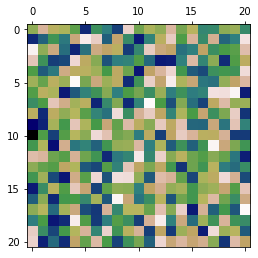

In [17]:
plt.matshow(data[10,...], cmap=plt.cm.gist_earth_r)

params = fitgaussian3d(data)
fit = gaussian3d(*params)

plt.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, z, width_x, width_y, width_z) = params

plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

In [15]:
gaussian3d(3, 5, 10, 1, 2, 4, 1)(Xin, Yin, Zin)

array([[[3.51263886e-03, 5.79136241e-03, 3.51263886e-03, ...,
         1.01678261e-65, 2.55314026e-73, 2.35845047e-81],
        [6.36056728e-03, 1.04868026e-02, 6.36056728e-03, ...,
         1.84115544e-65, 4.62313977e-73, 4.27060209e-81],
        [1.08196894e-02, 1.78386521e-02, 1.08196894e-02, ...,
         3.13191091e-65, 7.86422566e-73, 7.26453886e-81],
        ...,
        [1.08196894e-02, 1.78386521e-02, 1.08196894e-02, ...,
         3.13191091e-65, 7.86422566e-73, 7.26453886e-81],
        [6.36056728e-03, 1.04868026e-02, 6.36056728e-03, ...,
         1.84115544e-65, 4.62313977e-73, 4.27060209e-81],
        [3.51263886e-03, 5.79136241e-03, 3.51263886e-03, ...,
         1.01678261e-65, 2.55314026e-73, 2.35845047e-81]],

       [[1.08196894e-02, 1.78386521e-02, 1.08196894e-02, ...,
         3.13191091e-65, 7.86422566e-73, 7.26453886e-81],
        [1.95919265e-02, 3.23016259e-02, 1.95919265e-02, ...,
         5.67115802e-65, 1.42402730e-72, 1.31543805e-80],
        [3.33269896e-02, 

In [11]:
Xin, Yin, Zin

(array([[[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],
 
        [[ 1,  1,  1, ...,  1,  1,  1],
         [ 1,  1,  1, ...,  1,  1,  1],
         [ 1,  1,  1, ...,  1,  1,  1],
         ...,
         [ 1,  1,  1, ...,  1,  1,  1],
         [ 1,  1,  1, ...,  1,  1,  1],
         [ 1,  1,  1, ...,  1,  1,  1]],
 
        [[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         ...,
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2]],
 
        ...,
 
        [[18, 18, 18, ..., 18, 18, 18],
         [18, 18, 18, ..., 18, 18, 18],
         [18, 18, 18, ..., 18, 18, 18],
         ...,
         [18, 18, 18, ..., 18, 18, 18],
         [18, 18, 18, ..., 18, 18, 18],
